# Tutorial

Throughout the semester, we will use multiple Python libraries that you may or may not be familiar with. You will find below resources for the most important ones, either in the form of documentation links or short tutorials.

## NumPy

NumPy is a fundamental package for scientific computing in Python. It provides support for arrays, matrices, and a variety of mathematical functions to operate on these data structures.
- [Official NumPy Documentation](https://numpy.org/doc/stable/)
- [NumPy Quickstart](https://numpy.org/doc/stable/user/quickstart.html)
- [NumPy for Matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

## Matplotlib

Matplotlib is the de facto plotting library for Python. It provides a simple Matlab-like API to create line plots, scatter plots, bar plots, and more.
- [Official Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)

## mpt4py

The Multi-Parametric Toolbox for Python (mpt4py for short) offers efficient routines for various polyhedral computations that arise in optimal control.
It is currently being developed by our lab while it is very much functional it may contain a few bugs. Please do report them if you find some.

You can find the documentation in the form of local HTML files in this directory [`mpt4py_doc_html`](mpt4py_doc_html). Simply open the `index.html` file in your web browser to view it.

> **NOTE**: ignore the installation section, you should already have it installed.

In the following subsections we will also go through the basic operations that `mpt4py` supports.

In [1]:
import numpy as np
from mpt4py.base import HData, VData
from mpt4py import Polyhedron
%config InlineBackend.figure_format = 'retina'


### Polyhedron Creation
A polyhedron can be represented in two ways:
- The halfspace representation (**H-rep**), given by the feasible region of inequalities and equalities:
	$$P = \left\{ x \in\mathbb{R}^n \mid A x \leq b, A_e x = b_e \right\}$$
- The vertex representation (**V-rep**), given by vertices (and rays for unbounded polyhedra):
	$$P = \left\{ x \in\mathbb{R}^n \mid x = V^\top \lambda + R^\top \mu, ~ 1^\top \lambda = 1 , ~ \lambda,\mu \geq 0 \right\} $$


The `mpt4py` provides two classes `HData` and `VData` to represent both representations, respectively. The users can easily create a polyhedron from either of them.

We will show how to create a polyhedron in the following.



#### Create a polyhedron from H-rep

For example, to create a 2D hexgon from its H-rep, we just need to write down the arrays representing the left-hand side and right-hand side of inequalities and equalities `A, b, Ae, be` (in this example there is no equality, so we ignore `Ae` and `be`).

A `HData` object should be constructed using these arrays. With this object, we can then create a `Polyhedron` object.

In [2]:
# Create a 2D hexagon from H-representation
theta = np.linspace(0, 2*np.pi, 7).reshape((-1,1))[:-1]
A = np.column_stack((np.sin(theta), np.cos(theta)))
b = np.sqrt(3)/2 * np.ones((6))

hrep = HData(A=A, b=b, Ae=None, be=None) # you can save the Ae and be arguments since their default values are None
hexagon_1 = Polyhedron(H=hrep)

An equivalent but more compact way is to use the class method `from_Hrep()`, since this will save the efforts to create a `HData` object.

In [3]:
hexagon_1 = Polyhedron.from_Hrep(A=A, b=b) # a more compact way 

#### Create a polyhedron from V-rep
Similarly, we can create the same hexagon from its V-rep. We will need to write down its vertices `V` and rays `R` (in this example there are only vertices), and use them to create a `VData` object. 

In [4]:
# Create the same 2D hexagon from V-representation
V = np.column_stack((np.cos(theta), np.sin(theta))) # the vertices
vrep = VData(V=V, R=None)
hexagon_2 = Polyhedron(V=vrep)

Of course, there is also a classmethod `from_Vrep()` to do the same job.

In [5]:
hexagon_2 = Polyhedron.from_Vrep(V=V) # a more compact way

### Polyhedron Visualization

With `mpt4py`, a polyhedron `P` can be easily visualized with `P.plot(ax, **kwargs)`. Two backends are supported: matlotlib and [pyvista](https://docs.pyvista.org/index.html) with unified API.

- To use matplotlib, pass a [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) object as the `ax` argument. 
	
	**Note:** supports bounded polyhedra only. Limited 3D capabilities.

- To use pyvista, pass a [`pyvista.Plotter`](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.plotter) object as the `ax` argument. 

	**Note:** supports both bounded and unbounded polyhdra. Better support for 3D plotting. 



#### Visualize a 2D polyhedron
It's possible to use kwargs to control some visualization properties. We plot the 2D hexagon again with some arguments to customize the visualization.

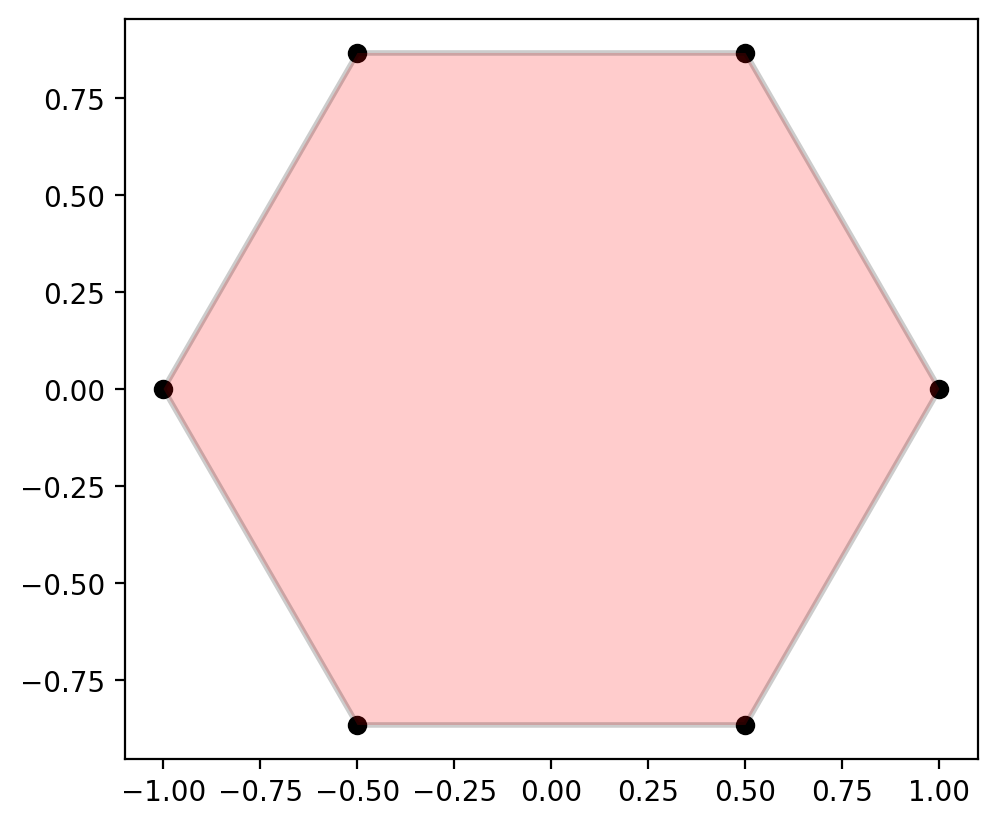

In [6]:
# Visualization with matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')

hexagon_1.plot(ax, 
               opacity=0.2, 
               color='r', 
               show_edges=True,
               show_vertices=True,
               edge_color='black',
               line_width=2.,
               vertex_color='black'
               )
plt.show()

In [7]:
# Visualization with pyvista
import pyvista as pv
plotter = pv.Plotter()

hexagon_2.plot(
    plotter,
    label='hexagon',
    opacity=0.5,
    color='red',
    show_edges=True,
	show_vertices=True,
	edge_color='black',
	line_width=2.,
	vertex_color='black'
    )

plotter.view_xy()  # view the 3D object in a 2D manner on the xy plane 
plotter.show_bounds()
plotter.add_legend()
plotter.show()

TypeError: PyvistaPlotter.plot_convexhull() got an unexpected keyword argument 'label'

#### Visualize a 3D polyhedron

Compare to 2D, the only difference to plot a 3D polyhedron using matplotlib is that we have to set `projection=3d` when creating the `matplotlib.axes.Axes` object.


In [ ]:
V = np.array([[1, 0, 0], [0, 1, 0], [-1, 0, 0], [0, -1, 0], [0, 0, 1]], dtype=np.float64)  # a pyramid
P = Polyhedron.from_Vrep(V)
ax = plt.subplot(projection='3d')  # ! don't forget the projection argument

P.plot(
    ax, 
    color='r',
    opacity=0.5, 
    show_edges=True, 
    show_vertices=True,
    # label='pyramid',  # label is not yet available for 3D polyhedron plotting in mpt4py
    )
plt.show()

The way to plot a 3D polyhedron using PyVista is basically the same as 2D. 

In [ ]:
plotter = pv.Plotter()
P.plot(
    plotter, 
    label='3D Polyhedron', 
    opacity=0.5,
    color='blue', 
    show_edges=True, 
    show_vertices=False,
    )
plotter.show_bounds()
plotter.add_legend()
plotter.show()

Thanks to the PyVista backend, it's also possible to nicely visualize an unbounded polyhedron.

In [ ]:
R = np.array([[0, 0, 1]], dtype=np.float64)
P = Polyhedron.from_Vrep(V, R)  # add a ray to make the polyhedron unbounded
plotter = pv.Plotter()
P.plot(
    plotter, 
    label='3D Polyhedron', 
    opacity=0.5,
    color='green', 
    )
plotter.show_bounds()
plotter.add_legend()
plotter.show()

### Polyhedron Operations

#### Set containment and equivalence

To determine if a polyhedron $P_1$ is a subset of another polyhedron $P_2$, just use `P1 in P2` or `P2.contains(P1)`. 


In [ ]:
print("Is hexagon 1 a subset of hexagon 2? ", hexagon_1 in hexagon_2)
print("Is hexagon 2 a subset of hexagon 1? ", hexagon_2 in hexagon_1)

print("Does hexagon 1 contain hexagon 2? ", hexagon_1.contains(hexagon_2))
print("Does hexagon 2 contain hexagon 1? ", hexagon_2.contains(hexagon_1))


For two polyhedra $P_1$ and $P_2$, we have $ P_1 = P_2 \iff P_1 \subseteq P_2,~ P_2\subseteq P_1$.

We can verify the two hexagons we just created are identical using the `==` operator.


In [ ]:
print("Are the two hexagons identical? ", hexagon_1 == hexagon_2)

#### Affine map

Based on the transformation matrix $T\in\mathbb{R}^{n\times d}$ and vector $t$, the affine map of a polyhedron $P$ to another polyhedron $Q$ is defined by:

$$Q = \{ y \in \mathbb{R}^n \mid y=Tx+t, x \in P \subseteq \mathbb{R}^d \}.$$

		
In *mpt4py*, this can be computed with `Q = P.affine_map(T, t)`, or `Q = T @ P + t`.

In [ ]:
alpha = np.pi/3
T = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
t = np.array([1.5, 0.])

hexagon_3 = hexagon_2.affine_map(T, t)
# Optionally and equivalently:
hexagon_3 = T @ hexagon_2 + t

ax = plt.subplot()
ax.set_aspect('equal')
hexagon_1.plot(ax, color='red', opacity=0.3)
hexagon_3.plot(ax, color='blue', opacity=0.3)
plt.show()

#### Intersection

The intersection of two polyhedra $P_1$ and $P_2$ is still a polyhedron. In *mpt4py*, it can be computed with `P1.intersection(P2)`.


In [ ]:
P4 = hexagon_1.intersect(hexagon_3)

ax = plt.subplot()
ax.set_aspect('equal')
P4.plot(ax, color='purple', opacity=0.3)
plt.show()

#### Minkowski sum and Pontryagin difference

To compute the Minkowski sum or Pontryagin difference of two polyhedra with *mpt4py*, just simply do `P1 + P2` or `P1 - P2`, respectively.

In [ ]:
# Compute the Minkowski sum of the hexagon_1 and a small square
square_1 = Polyhedron.from_Vrep(0.2 * np.array([[1,1], [-1,1], [1,-1], [-1,-1]]))
P5 = hexagon_1 + square_1
# Optionally and equivalently, use:
P5 = hexagon_1.minkowski_sum(square_1)

ax = plt.subplot()
ax.set_aspect('equal')
P5.plot(ax, color='gray', opacity=0.3)
hexagon_1.plot(ax, color='red', opacity=0.3)
square_1.plot(ax, color='green', opacity=0.3)

plt.show()

In [ ]:
# Compute the Pontragin difference of the hexagon_1 and a small square
P6 = hexagon_1 - square_1
# Optionally and equivalently, use:
P6 = hexagon_1.pontryagin_difference(square_1)

ax = plt.subplot()
ax.set_aspect('equal')
hexagon_1.plot(ax, color='red', opacity=0.3)
square_1.plot(ax, color='green', opacity=0.3)
P6.plot(ax, color='gray', opacity=0.3)

plt.show()